# ``eBOSS`` quasar luminosity function

In [1]:
import os

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
harmony_sty = matplotlib.rc_params_from_file("./harmony.mplstyle", use_default_template=False)

## Luminosity function measurements

In [3]:
var_values = np.genfromtxt("data/input/luminosity_function_in_redshift_bins.txt").T
with open("data/input/luminosity_function_in_redshift_bins.txt", 'r') as data_file:
    var_names = tuple(map(
        lambda var_name: var_name.strip(" "), 
        data_file.readline().strip("#").strip("\n").split(",")
    ))

lum_func_data = dict(zip(var_names, var_values))

In [4]:
redshift_bin_labels = tuple(map(
    lambda redshift_range: r"${}$".format(redshift_range),
    [
        var_name.split("z_")[-1].replace("_", "<z<")
        for col_no, var_name in enumerate(var_names) if col_no % 2 == 1
    ]
))

## Hybrid luminosity function models

In [5]:
with open("data/input/luminosity_function_parameters.txt", 'r') as parameter_file:
    par_names = tuple(map(
        lambda var_name: var_name.strip(" "), 
        parameter_file.readline().strip("#").strip("\n").split(",")
    ))
    par_values = tuple(map(
        lambda value: float(value), 
        parameter_file.readline().split(",")
    ))
    
model_parameters = dict(zip(par_names, par_values))

## Luminosity function

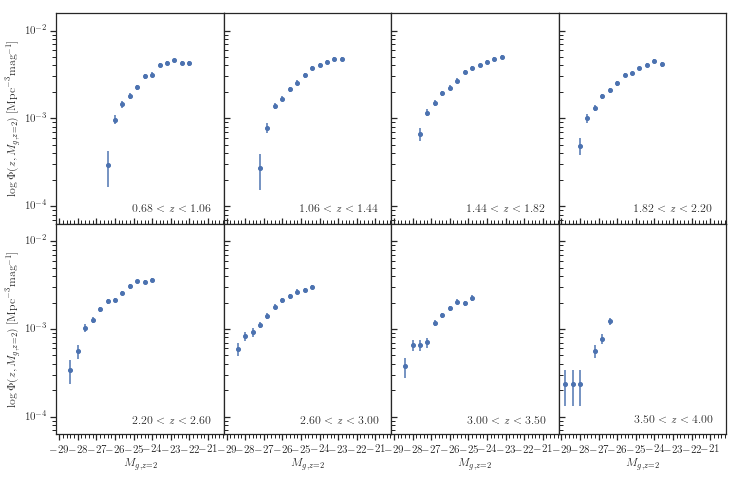

In [6]:
plt.style.use(harmony_sty)
sns.set(style='ticks', font='serif')
plt.figure("Luminosity function in redshift bins", figsize=(12, 7.75))

num_row, num_col = 2, 4
row_span, col_span = 4, 3

for bin_idx, redshift_bin in enumerate(redshift_bin_labels):
    
    row_idx, col_idx = bin_idx // num_col, bin_idx % num_col
    ax = plt.subplot2grid(
        (num_row*row_span, num_col*col_span), 
        (row_idx*row_span, col_idx*col_span), 
        rowspan=row_span, 
        colspan=col_span
    )
    
    plt.errorbar(
        lum_func_data['magnitude'], 
        np.exp(lum_func_data[var_names[2*bin_idx+1]]), 
        yerr=np.exp(lum_func_data[var_names[2*bin_idx+1]])*lum_func_data[var_names[2*bin_idx+2]],
        fmt='o',
        marker='o',
        markersize=4.,
        capsize=0.
    )
    
    ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1.))
    ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(0.2))
    if row_idx + 1 < num_row:
        plt.tick_params(axis='x', which='both', direction='in', labelbottom=False, labelsize=2)
    else:
        plt.xlabel(r"$M_{g,z=2}$")
    if col_idx > 0:
        plt.tick_params(axis='y', which='both', direction='in', labelleft=False, labelsize=2)
    else:
        plt.ylabel(r"$\log\Phi(z,M_{g,z=2})$ [$\textrm{Mpc}^{-3} \textrm{mag}^{-1}$]")
    plt.xlim(-29.15, -20.15)
    plt.ylim(10**(-4.2), 10**(-1.8))
    plt.yscale('log')
    
    plt.title(redshift_bin_labels[bin_idx], loc='right', position=(0.925, 0.025))

plt.subplots_adjust(hspace=0, wspace=0)